In [40]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from markovchain import MarkovChain
import networkx as nx


In [41]:
def markov(df, col1, col2):
    l=len(df)
    pax_pax = 0
    pax_prorus = 0
    pax_proukr = 0
    pax_nocare = 0
    prorus_prorus = 0
    prorus_proukr = 0
    prorus_pax = 0
    prorus_nocare = 0
    proukr_proukr = 0
    proukr_pax = 0
    proukr_prorus = 0
    proukr_nocare = 0
    nocare_pax = 0
    nocare_prorus = 0
    nocare_proukr = 0
    nocare_nocare = 0
    for i in range(len(df)):
        if df[col1][i]=='pax':
            if df[col2][i]=='pax':
                pax_pax += 1
            elif df[col2][i] =='prorus':
                pax_prorus += 1
            elif df[col2][i] == 'proukr':
                pax_proukr += 1
            else:
                pax_nocare += 1
                
        elif df[col1][i]=='prorus':
            if df[col2][i]=='pax':
                prorus_pax += 1
            elif df[col2][i] =='prorus':
                prorus_prorus += 1
            elif df[col2][i] == 'proukr':
                prorus_proukr += 1
            else:
                pax_nocare += 1
                
        elif df[col1][i]=='proukr':
            if df[col2][i]=='pax':
                proukr_pax += 1
            elif df[col2][i] =='prorus':
                proukr_prorus += 1
            elif df[col2][i] == 'proukr':
                proukr_proukr += 1
            else:
                proukr_nocare += 1

        elif df[col1][i]=='nocare':
            if df[col2][i]=='pax':
                nocare_pax += 1
            elif df[col2][i] =='prorus':
                nocare_prorus += 1
            elif df[col2][i] == 'proukr':
                nocare_proukr += 1
            else:
                nocare_nocare += 1
    #building transition matrix
    P=np.array([[pax_pax/l, pax_prorus/l,pax_proukr/l,pax_nocare/l],
                [prorus_pax/l,prorus_prorus/l,prorus_proukr/l,prorus_nocare/l],
                [proukr_pax/l,proukr_prorus/l,proukr_proukr/l,proukr_nocare/l],
               [nocare_pax/l,nocare_prorus/l,nocare_proukr/l,nocare_nocare/l]])
    return P

In [42]:
df=pd.read_excel('markov.xlsx')

In [43]:
df

,utente,cat1,cat2
0,1,pax,proukr
1,2,pax,pax
2,3,prorus,nocare
3,4,prorus,pax
4,5,proukr,proukr
5,6,proukr,proukr
6,7,proukr,pax
7,8,pax,proukr
8,9,prorus,prorus
9,10,prorus,prorus


In [44]:
y=df['cat1'].value_counts()
y

prorus    11
pax        8
proukr     8
nocare     4
Name: cat1, dtype: int64

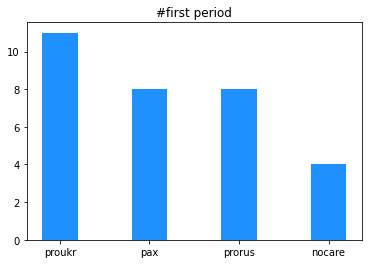

In [45]:
x=['proukr','pax','prorus','nocare']
y=df['cat1'].value_counts()
plt.bar(x,y, width=0.4, color='dodgerblue')
plt.title('#first period')
plt.show()

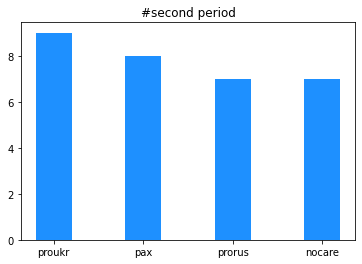

In [46]:
x=['proukr','pax','prorus','nocare']
y=df['cat2'].value_counts()
plt.bar(x,y, width=0.4, color='dodgerblue')
plt.title('#second period')
plt.show()

In [47]:
df['cat1'].value_counts()

prorus    11
pax        8
proukr     8
nocare     4
Name: cat1, dtype: int64

In [48]:
matrix=markov(df,'cat1','cat2')
matrix

array([[0.09677419, 0.        , 0.09677419, 0.12903226],
       [0.06451613, 0.22580645, 0.        , 0.        ],
       [0.06451613, 0.        , 0.12903226, 0.06451613],
       [0.        , 0.03225806, 0.        , 0.09677419]])

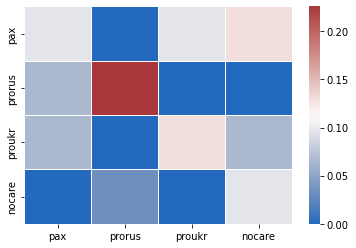

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(matrix, linewidth=0.5,cmap="vlag")
ax.set_xticklabels(['pax','prorus','proukr','nocare'])
ax.set_yticklabels(['pax','prorus','proukr','nocare'])
plt.show()

In [50]:
states=['pax','prorus','proukr','nocare']

transition=[['pax','pax'],['pax','prorus'],['pax,proukr'],['pax','nocare'],
       ['prorus','pax'],['prorus','prorus'],['prorus,proukr'],['prorus','nocare'],
       ['proukr','pax'],['proukr','prorus'],['proukr,proukr'],['proukr','nocare']]

P=markov(df,'cat1','cat2')

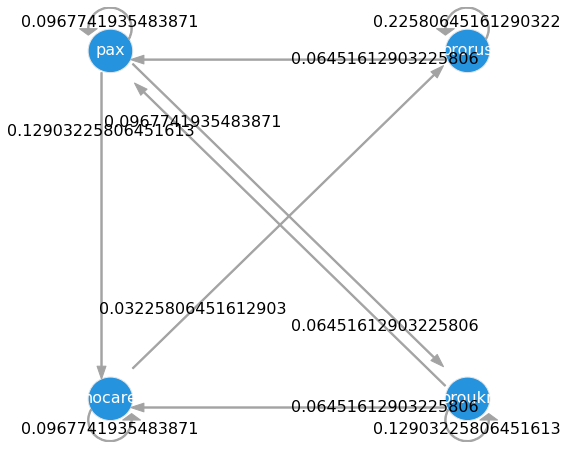

In [51]:
mc = MarkovChain(P, states)
mc.draw()